# <u>EPXLORATORY DATA ANALYSIS</u>

In this notebook, I will explore the Fake_Real_Job_Posting.csv dataset. By examining some samples, plotting relevant information, and determining class balance, my aim is to gain a deeper understanding of the data's structure and complexity. Ultimately, I hope to identify potential features that can enhance the performance of my training models.

In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## ***Reading data***

In [23]:
path = 'Data/Fake_Real_Job_Posting.csv'
data = pd.read_csv(path)

data.head(10)

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent
0,0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real
1,1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real
2,2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real
3,3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,Not Mentioned,Not Mentioned,Not Mentioned,Real
4,4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real
5,5,Insurance Agent,"US, PA, Reading",Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Real
6,6,Chief Commercial Officer,"US, NY,",Requisite Capabilities and Characteristics – F...,Full-time,Food & Beverages,Sales,Real
7,7,UI Designer,"US, TX, Austin","Bachelor’s degree in graphic design, web desig...",Full-time,Computer Software,Product Management,Real
8,8,Fiinovation - Post for Relationship Manager,"IN, DL, New Delhi",Desired Candidate Profile: Articulate in Engli...,Full-time,Nonprofit Organization Management,Other,Real
9,9,Account Management Intern,"GB, ,",A good eye for detail.Proven management skills...,Not Mentioned,Not Mentioned,Not Mentioned,Real


In [24]:
# get the shape of the dataset (number of columns and rows)
data.shape

(17880, 8)

In [25]:
# display the types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       17880 non-null  int64 
 1   title            17880 non-null  object
 2   location         17880 non-null  object
 3   requirements     17879 non-null  object
 4   employment_type  17880 non-null  object
 5   industry         17880 non-null  object
 6   function         17880 non-null  object
 7   fraudulent       17880 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [26]:
# delete the "unnamed" column since it is useless and it is just presenting index
data = data.drop('Unnamed: 0',axis=1)

In [48]:
data.head()

,title,location,requirements,employment_type,industry,function,fraudulent,requirements_len
0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real,514
1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real,1095
2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real,529
3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,Not Mentioned,Not Mentioned,Not Mentioned,Real,1724
4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real,498


## ***Data Exploration***

In [27]:
class_labels = ["Real", "Fake"]
category_orders = {"Offer_status": class_labels}

# let's first see the number of offers that are fraudulent (Fake class) and the number of offers that are not fraudulent (Real class)
print("count of the unique values: \n", data['fraudulent'].value_counts())

# let's then plot the repartition of fraudulent and non-fraudulent job offers:
job_status_distribution = px.histogram(data, x = 'fraudulent', color = 'fraudulent', title='Offer status distribution')
job_status_distribution.show()

count of the unique values: 
 fraudulent
Real    17014
Fake      866
Name: count, dtype: int64


The dataset have unbalanced classes, there is way less fake job post than real ones. This can have a significant impact on our future training model and on the predictions (detecting fraudulent job postings). Indeed, the model(s) may become more inclined to predict the "Real" class because of its majority in the dataset which lead to huge bias. Thus, the accuracy of our model could also be impacted. In the next steps, it might be interesting to balance the classes by oversampling of subsampling.

While plotting the first 10 rows of the dataset, I saw that some columns contained "Not Mentioned" values. Let's observe the columns that have the most "Not Mentioned" values.

In [31]:
not_mentioned_count = data.applymap(lambda x: 1 if x == "Not Mentioned" else 0).sum()

results = pd.DataFrame({'Column': not_mentioned_count.index, 'Count of "Not Mentioned"': not_mentioned_count.values})

# plot the total of "Not Mentioned" per column
fig = px.bar(results, x='Column', y='Count of "Not Mentioned"',
             title='Count of "Not Mentioned" in each column')
fig.show()


/var/folders/4v/0tzd3xtn06nd92x1lf625rv80000gn/T/ipykernel_44972/2305662768.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



The "function" and "Industry" colums contain a lot of missing values represented by "Not Mentioned" in the dataset. This could be important to take this ovservation into account and maybe not consider those columns in our future models since those features contain a lot of missing values. Indeed, the large number of missing values in these features could potentially introduce bias or noise into the model.

Finally, let's see if the lenght of the requirements have an impact on the fraudulent field or not. 

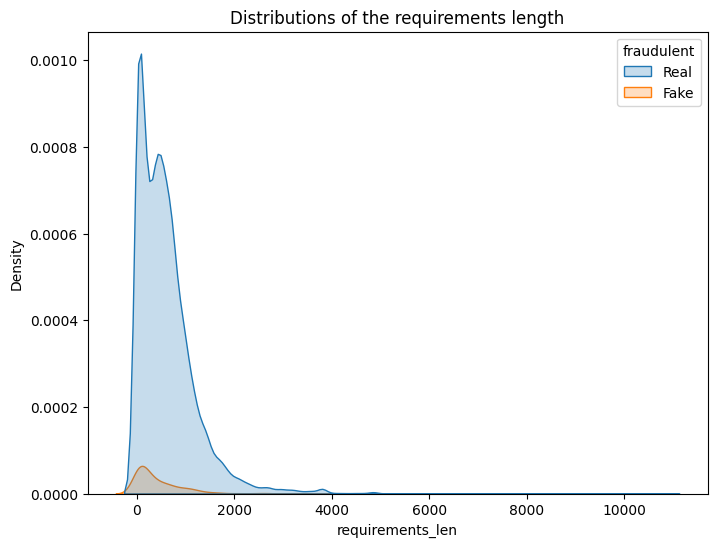

In [47]:
plt.figure(figsize=(8,6))

data['requirements_len'] = data['requirements'].astype(str).apply(len)
sns.kdeplot(data = data, x = 'requirements_len', hue="fraudulent", fill=True)

plt.title("Distributions of the requirements length")
plt.show()

The requirement lenght doesn't seem to have an impact on whether the offer post is a fraud or not. It will probably not be usefull to take to feature into consideration for our model.